## Import Libraries and Load Dataset

In [40]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime, timedelta
from datetime import date
import statistics as stat
from scipy import stats as scstats
import matplotlib.pyplot as plt #Library for charting data
import seaborn as sns #Library for extra datasets, charting data
import plotly as plot #Library for interactive charts

In [16]:
trans = pd.read_csv('transactions.csv')
trans.head()

,Transaction_ID,Product,Category,Quantity,Unit_Price,Date,Store
0,1,Charger,Gadgets,4,956.903512,2022-06-01,Store_A
1,2,Laptop,Electronics,5,303.653831,2022-04-04,Store_B
2,3,Tablet,Gadgets,8,226.925798,2022-08-10,Store_A
3,4,Laptop,Electronics,4,975.494448,2022-04-22,Store_C
4,5,Mobile,Gadgets,8,656.776002,2022-03-05,Store_A


In [3]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Transaction_ID  2000 non-null   int64  
 1   Product         2000 non-null   object 
 2   Category        2000 non-null   object 
 3   Quantity        2000 non-null   int64  
 4   Unit_Price      2000 non-null   float64
 5   Date            2000 non-null   object 
 6   Store           2000 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 109.5+ KB


## Analyze Transaction Data

In [18]:
# Calculate revenue for each transaction by multiplying quantity and unit price

trans['Revenue'] = trans['Quantity'] * trans['Unit_Price']
trans.head()

,Transaction_ID,Product,Category,Quantity,Unit_Price,Date,Store,Revenue
0,1,Charger,Gadgets,4,956.903512,2022-06-01,Store_A,3827.614047
1,2,Laptop,Electronics,5,303.653831,2022-04-04,Store_B,1518.269156
2,3,Tablet,Gadgets,8,226.925798,2022-08-10,Store_A,1815.406386
3,4,Laptop,Electronics,4,975.494448,2022-04-22,Store_C,3901.977794
4,5,Mobile,Gadgets,8,656.776002,2022-03-05,Store_A,5254.208013


In [20]:
#Convert the Date column to datetime format

trans['Date'] = pd.to_datetime(trans['Date'])
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Transaction_ID  2000 non-null   int64         
 1   Product         2000 non-null   object        
 2   Category        2000 non-null   object        
 3   Quantity        2000 non-null   int64         
 4   Unit_Price      2000 non-null   float64       
 5   Date            2000 non-null   datetime64[ns]
 6   Store           2000 non-null   object        
 7   Revenue         2000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 125.1+ KB


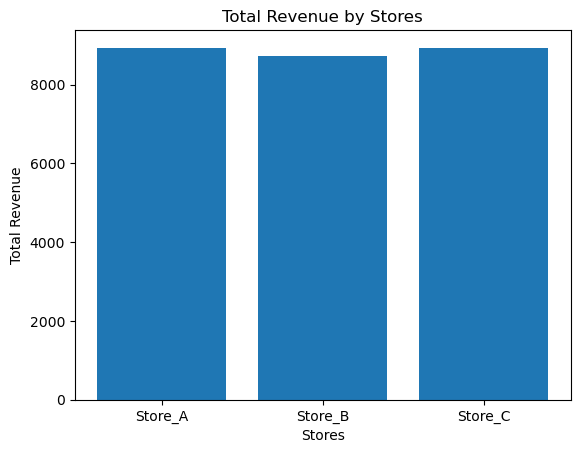

In [76]:
#Plot the distribution of total revenue across different stores using a bar plot
#Add the title as Total Revenue per Store and provide the label for y-axis

figsize = (10,6)
plt.bar(x = trans['Store'], height = trans['Revenue'])
plt.title('Total Revenue by Stores')
plt.xlabel('Stores')
plt.ylabel('Total Revenue')
plt.show()

## Analyze Monthly Revenue Trends

In [24]:
# Extract the month from the Date column

trans['Month'] = trans['Date'].dt.month
trans.head()

,Transaction_ID,Product,Category,Quantity,Unit_Price,Date,Store,Revenue,Month
0,1,Charger,Gadgets,4,956.903512,2022-06-01,Store_A,3827.614047,6
1,2,Laptop,Electronics,5,303.653831,2022-04-04,Store_B,1518.269156,4
2,3,Tablet,Gadgets,8,226.925798,2022-08-10,Store_A,1815.406386,8
3,4,Laptop,Electronics,4,975.494448,2022-04-22,Store_C,3901.977794,4
4,5,Mobile,Gadgets,8,656.776002,2022-03-05,Store_A,5254.208013,3


In [26]:
#Group the data by month and calculate the total revenue for each month

Rev_by_month = trans.groupby('Month')['Revenue'].sum().reset_index()
Rev_by_month

,Month,Revenue
0,1,365986.810273
1,2,426452.461588
2,3,398036.137292
3,4,464157.221569
4,5,429056.766214
5,6,443771.123636
6,7,413733.554818
7,8,468731.025016
8,9,417630.696108
9,10,425184.599157


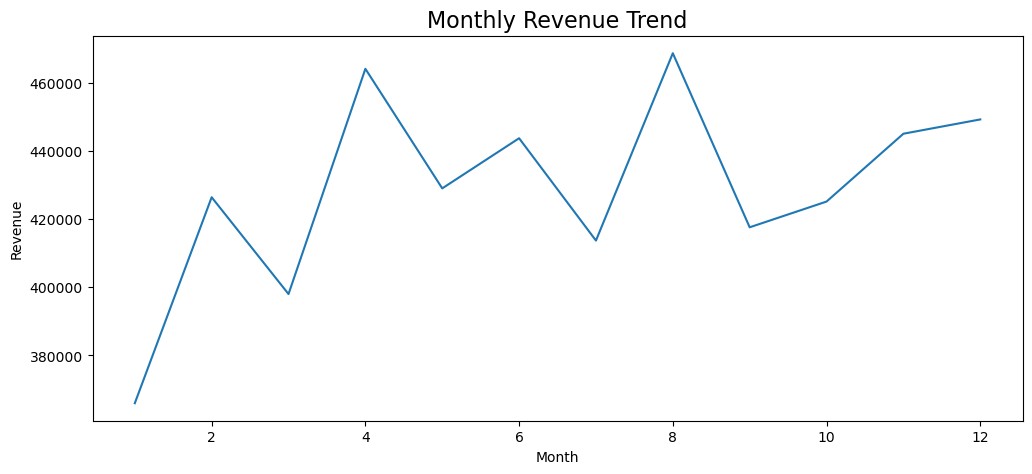

In [66]:
#Plot the monthly revenue trend using a line plot

plt.figure(figsize=(12,5))
x = [1,2,3,4,5,6,7,8,9,10,11,12]
y = [365986.810273, 426452.461588, 398036.137292,
     464157.221569, 429056.766214, 443771.123636,
     413733.554818, 468731.025016, 417630.696108,
     425184.599157, 445097.859105, 449295.068919]
plt.plot(x, y)

plt.title("Monthly Revenue Trend", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()

## Analyze Sales Volume of Products

In [112]:
# Group the data by product and calculate the total quantity sold for each product 

sales_vol = trans.groupby('Product').sum('Quantity')
sales_vol

#identify the top 5 products by sales volume
sales_vol.sort_values(by = ['Quantity'], ascending = False).reset_index()


,Product,Transaction_ID,Quantity,Unit_Price,Revenue,Month
0,Mobile,440392,2211,220182.198655,1.145126e+06,2885
1,Laptop,410856,2129,215831.738928,1.092600e+06,2790
2,Charger,400073,2062,195556.540811,1.014149e+06,2459
3,Headphones,386985,1924,188086.213197,9.699851e+05,2495
4,Tablet,362694,1874,180229.553807,9.252736e+05,2446


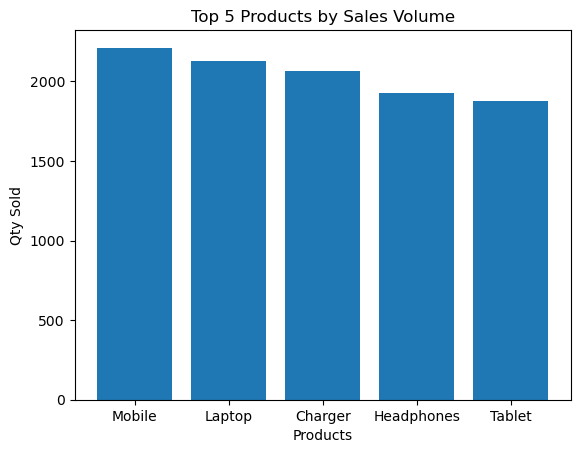

In [270]:
#Plot the top 5 products by sales volume using a bar plot

sales_vol = trans.groupby('Product').sum('Quantity').sort_values(by = ['Quantity'], ascending = False).reset_index()
figsize = (10,6)
plt.bar(x = sales_vol['Product'], height = sales_vol['Quantity'])
plt.title('Top 5 Products by Sales Volume')
plt.xlabel('Products')
plt.ylabel('Qty Sold')
plt.show()

## Analyze Quantity Sold by Product Category

In [156]:
# Group the data by product category and calculate the total quantity sold for each category

Qty_category = trans.groupby('Category')['Quantity'].sum().reset_index()
Qty_category


,Category,Quantity
0,Accessories,3505
1,Electronics,3411
2,Gadgets,3284


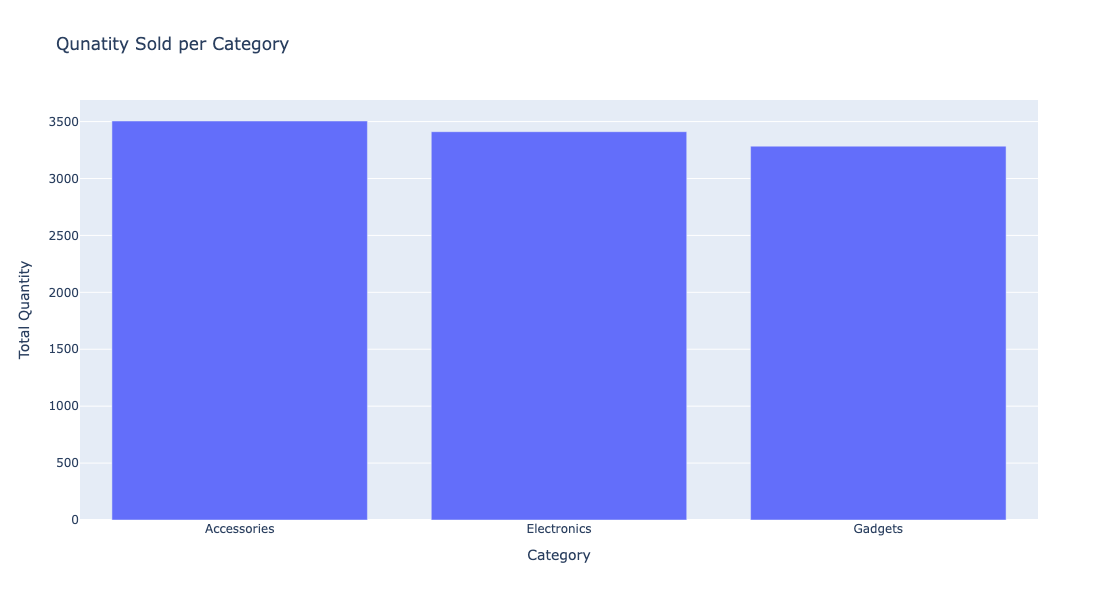

In [186]:
#Plot the total quantity sold per category using Plotly Express

import plotly.express as px

x = ['Accessories', 'Electronics', 'Gadgets']
y = [3505, 3411, 3284]
fig1 = px.bar(x = x, y = y,  barmode = 'group', height=600, title = 'Qunatity Sold per Category', 
              labels = {'x': 'Category','y':'Total Quantity'})
fig1.show()

## Analyze Store Revenue and Product Data

In [224]:
# Create a pivot table to show monthly revenue for each store

Rev_store = pd.pivot_table(trans, values = ['Revenue'], index = ['Month'], columns = 'Store',
                          aggfunc = 'sum')
print(Rev_store)

             Revenue                              
Store        Store_A        Store_B        Store_C
Month                                             
1      155844.177361  100283.584550  109859.048362
2      156625.914028  113986.074279  155840.473281
3       80540.518435  150940.806224  166554.812633
4      138393.315190  151849.663380  173914.242999
5      160807.271068  151298.035767  116951.459379
6      160766.094426  105211.656341  177793.372868
7      139729.307324  139308.339530  134695.907964
8      170930.819935  146628.049065  151172.156017
9      138720.309507  138825.608439  140084.778161
10     173776.625893  117974.432364  133433.540899
11     130279.573854  118404.157375  196414.127876
12     159697.284482  128447.501019  161150.283418


In [ ]:
# Plot the average unit price for products at each store using a bar plot

mean_price = trans.groupby('Store')['Unit_Price'].mean().reset_index()
print (mean_price)

figsize = (10,6)
plt.bar(x = mean_price['Store'], height = mean_price['Unit_Price'])
plt.title('Average Unit Price per Store')
plt.xlabel('Store')
plt.ylabel('Avg Unit Price')
plt.show()



<Axes: xlabel='Category', ylabel='Revenue'>

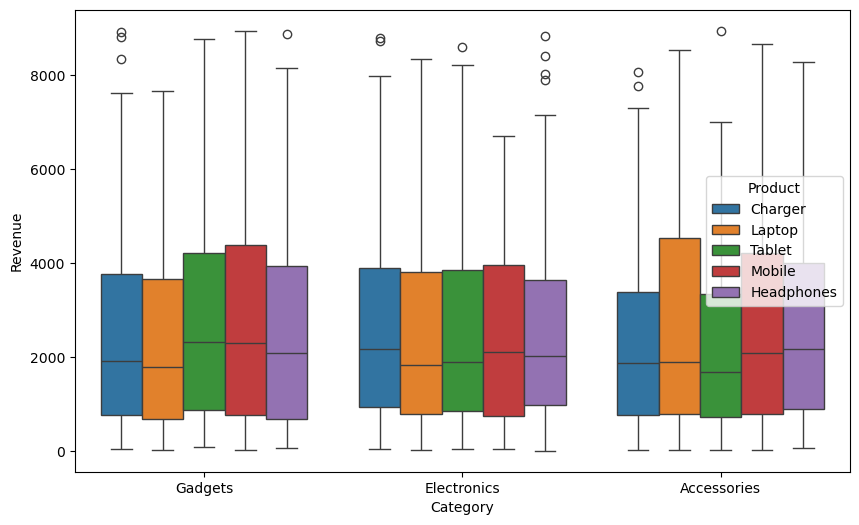

In [294]:
#Plot the revenue distribution for each product category using a box plot
plt.figure(figsize = (10, 6))
sns.boxplot(data = trans, x = 'Category', y = 'Revenue', hue = 'Product')


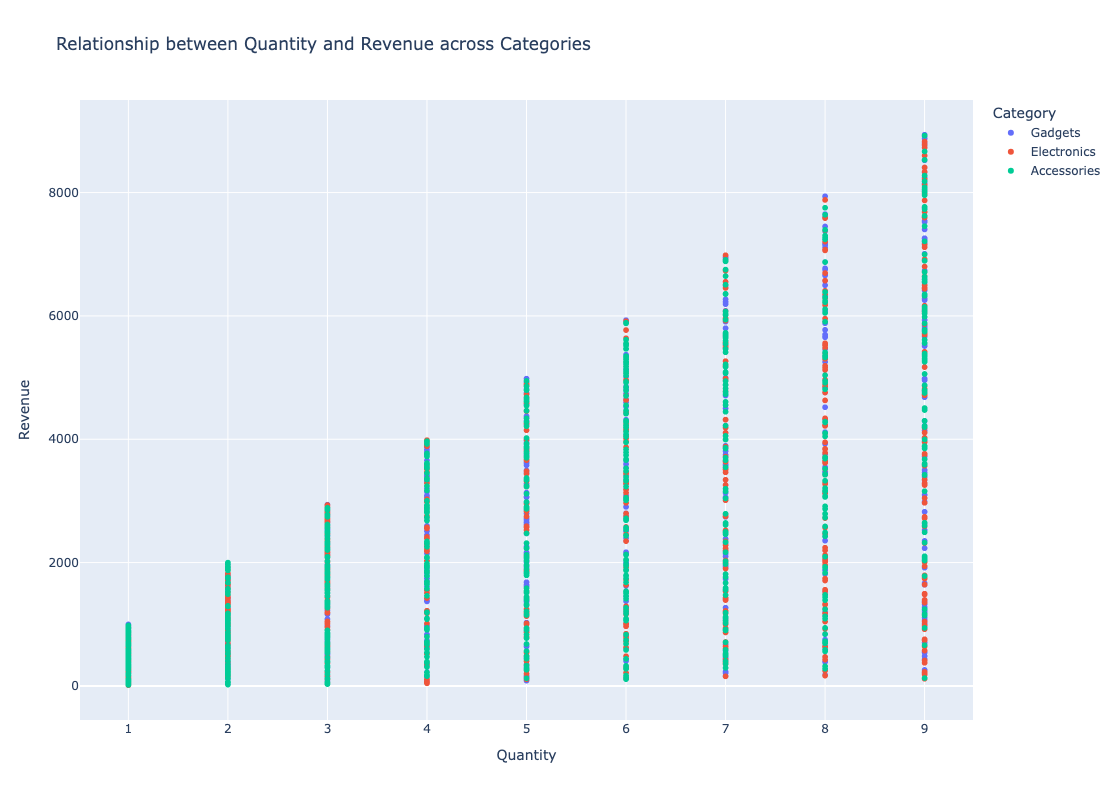

In [360]:
# Plot a scatter plot to show the relationship between quantity and revenue across different product categories using Plotly Express

fig3 = px.scatter(trans, x = 'Quantity', y = 'Revenue',  color = 'Category', height = 800, 
                  title = 'Relationship between Quantity and Revenue across Categories', labels = {'x': 'Quantity','y':'Revenue'})
fig3.show()